<h1 style='color:red'>Bike Sharing Assignment

<h3 style='color:green'>Linear Regression - Machine Learning 1 

`Submission Harish Dave`

## Step-1a: Read and understand the data

In [1]:
# Import necassary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, sklearn

In [2]:
# Read in the dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check no. of rows and columns
bike.shape

(730, 16)

<h3 style = 'color:blue'> Observation: 730 entries spread over 2 years, so 365 entries per year correspond to 1 entry/day.

In [4]:
# Check for null values
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<h3 style = 'color:blue'> Observation: no missing values

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<h3 style = 'color:blue'> Observation: temperatures, humidity and windspeed are of dtype float, remaining are int except the dteday which is a object. Datatypes in the provided dataset seems to be fine.

In [6]:
# Check if target variable cnt is indeed sum of casual and registered

cnt_check = bike.casual + bike.registered - bike.cnt
cnt_check.value_counts(normalize=True)

0    1.0
dtype: float64

<h3 style = 'color:blue'> Observation: cnt is a valid sum of casual & registered users

In [7]:
# yr : year (0: 2018, 1:2019)
# Check if there is any mismatch between yr and dteday
year_check = pd.DataFrame(pd.DatetimeIndex(bike.dteday).year)
year_check['tag'] = year_check.dteday.map({2018:0, 2019:1}) - bike.yr
year_check['tag'].value_counts(normalize=True)

0    1.0
Name: tag, dtype: float64

<h3 style = 'color:blue'> Observation: yr is categorized correctly

In [8]:
# Check if workingday 0 corresponds to a holiday or weekend
holiday_or_weekend = bike[(bike.workingday == 0)] # workingday 0 would mean it is holiday or weekend
holiday_or_weekend.drop(holiday_or_weekend[holiday_or_weekend.holiday == 1].index, inplace=True) # drop the holidays
print (holiday_or_weekend.weekday.value_counts()) # what remains should be 0 or 6
del(holiday_or_weekend)

6    103
0    102
Name: weekday, dtype: int64


<h3 style = 'color:blue'> Observation: holiday, weekday, workingday are consistent with each other

In [9]:
# Categorical variables handling

bike['season'] = bike['season'].map({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 :'Winter' })
bike['weathersit'] = bike['weathersit'].map({1: 'Clear', 2: 'Mist, Few clouds', 3: 'Light Snow, Rain, Thunder', 4: 'Heavy Rain, Snow, Ice, Thunder'})

In [10]:
bike.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,1,1,"Mist, Few clouds",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,2,1,"Mist, Few clouds",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [11]:
bike['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

<h3 style = 'color:blue'> Observation: homogenous data spread across the four seasons.

In [12]:
bike['weathersit'].value_counts()

Clear                        463
Mist, Few clouds             246
Light Snow, Rain, Thunder     21
Name: weathersit, dtype: int64

<h3 style = 'color:brown'> Observation: weathersit has no datapoint with 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. This could be because when there is heavy rain, bike rentals will be naturally low. Bike Rental demand during bad weather is normally low and it might not help in increasing revenues. The reason for this missing category is not investigated further.

`Summary:`<br>
**A few checks were performed on the provided dataset**<br>
**Categorical string labeling was done.**<br>
**So far, it seems fine to proceed to the EDA & Viz.**

## Step-1b: Exploratory Data Analysis & Visualization

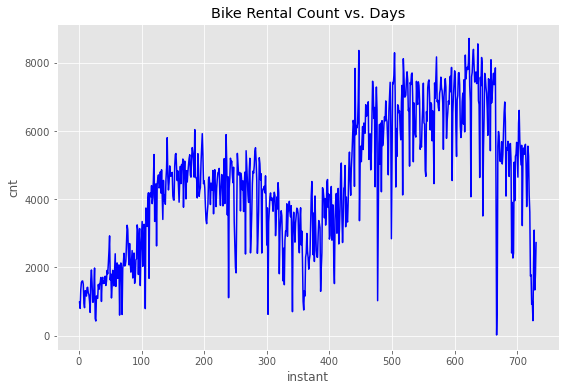

In [13]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(data=bike, x='instant', y='cnt', color='b')
plt.title('Bike Rental Count vs. Days')
plt.show()

<h3 style = 'color:blue'> Observation: Bike Rental demand seems to follow a seasonal trend. Dummy variables of season can be quite useful.

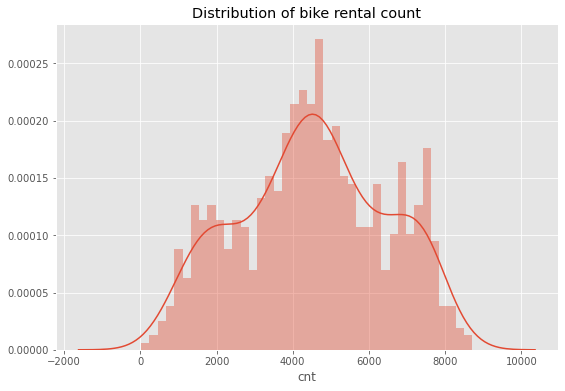

In [14]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.distplot(bike['cnt'], bins = 40)
plt.title('Distribution of bike rental count')
plt.show()

<h3 style = 'color:blue'> Observation: Bike Rental demand is showing signs of symmetrical distribution

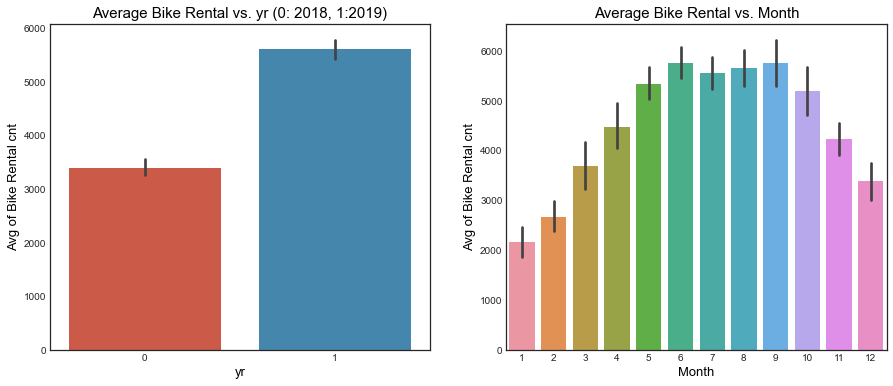

In [15]:
plt.figure(figsize=[15,6])
plt.style.use('seaborn-white')

plt.subplot(1,2,1)
sns.barplot(data=bike, x='yr', y='cnt')
plt.title('Average Bike Rental vs. yr (0: 2018, 1:2019)', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('yr', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('Avg of Bike Rental cnt', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.subplot(1,2,2)
sns.barplot(data=bike, x='mnth', y='cnt')
plt.title('Average Bike Rental vs. Month', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('Month', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('Avg of Bike Rental cnt', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.show()


<h3 style = 'color:blue'> Observation: Bike Rentals in year 2019 greater than 2018. Bike Rentals higher during months May to Oct.

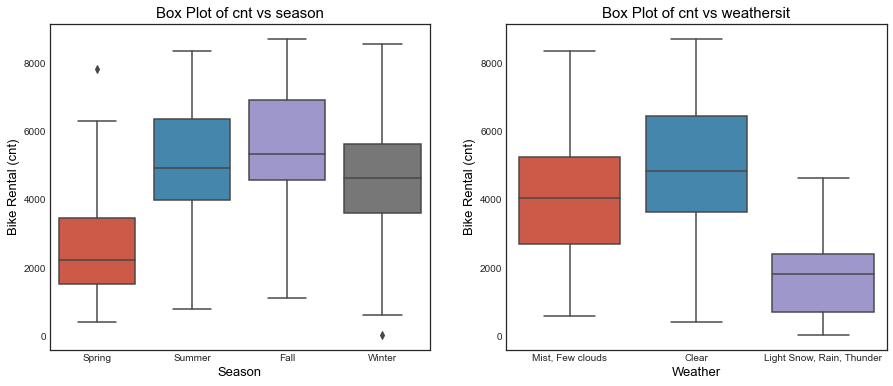

In [16]:
plt.figure(figsize=[15,6])
plt.style.use('seaborn-white')

plt.subplot(1,2,1)
sns.boxplot(data=bike, x='season', y='cnt')
plt.title('Box Plot of cnt vs season', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('Season', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('Bike Rental (cnt)', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.subplot(1,2,2)
sns.boxplot(data=bike, x='weathersit', y='cnt')
plt.title('Box Plot of cnt vs weathersit', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('Weather', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('Bike Rental (cnt)', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.show()

<h3 style = 'color:blue'> Observation: Seasons with higher bike rental demand = Summer, Fall. There are couple of outliers. One in Spring and other in Winter. Needs closer look.

<h3 style = 'color:blue'> Observation: Weather with higher bike rental demand = Clear or Mist, Few Clouds

In [17]:
bike[(bike.season == 'Spring') & (bike.cnt > 7000)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
440,441,17-03-2019,Spring,1,3,0,0,0,"Mist, Few clouds",21.080847,25.2523,75.5833,7.417168,3155,4681,7836


In [18]:
bike.loc[438:442,:]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
438,439,15-03-2019,Spring,1,3,0,5,1,Clear,22.857500,26.64125,57.9583,10.042161,1005,5187,6192
439,440,16-03-2019,Spring,1,3,0,6,0,"Mist, Few clouds",17.869153,21.81145,84.2083,7.583864,548,3830,4378
440,441,17-03-2019,Spring,1,3,0,0,0,"Mist, Few clouds",21.080847,25.25230,75.5833,7.417168,3155,4681,7836
441,442,18-03-2019,Spring,1,3,0,1,1,"Mist, Few clouds",19.372500,23.20000,81.0000,8.501161,2207,3685,5892
442,443,19-03-2019,Spring,1,3,0,2,1,Clear,22.345000,26.64105,72.8750,10.875239,982,5171,6153


<h3 style = 'color:blue'> Observation: Outlier in Spring is on 17th March 2019 where cnt is 7836. It is a sunday of Spring season with few clouds in weather. There are huge number of casual users but also there is 40% to 50% increase in registered users. It could be one of those days when people want to go out or maybe there was a special promotion. This outlier seems to be a genuine

In [19]:
bike[(bike.season == 'Winter') & (bike.cnt <= 100)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
666,667,29-10-2019,Winter,1,10,0,2,1,"Light Snow, Rain, Thunder",18.04,21.97,88.0,23.9994,2,20,22


In [20]:
bike.loc[663:668,:]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
663,664,26-10-2019,Winter,1,10,0,6,0,"Mist, Few clouds",22.379153,26.13750,80.7083,8.875289,1182,6262,7444
664,665,27-10-2019,Winter,1,10,0,0,0,"Mist, Few clouds",21.730000,25.75665,72.0000,15.791364,2643,5209,7852
665,666,28-10-2019,Winter,1,10,0,1,1,"Mist, Few clouds",19.577500,23.38855,69.4583,26.666536,998,3461,4459
666,667,29-10-2019,Winter,1,10,0,2,1,"Light Snow, Rain, Thunder",18.040000,21.97000,88.0000,23.999400,2,20,22
667,668,30-10-2019,Winter,1,10,0,3,1,"Mist, Few clouds",13.045462,15.49545,82.5455,14.271603,87,1009,1096
668,669,31-10-2019,Winter,1,10,0,4,1,"Mist, Few clouds",14.657500,18.05500,66.6667,11.166689,419,5147,5566


<h3 style = 'color:blue'> Observation: Outlier in Winter is on 29th October 2019 where cnt is 22. It is a working day with sudden bad weather. This is an outlier but with element of causation. Retain in the dataset.

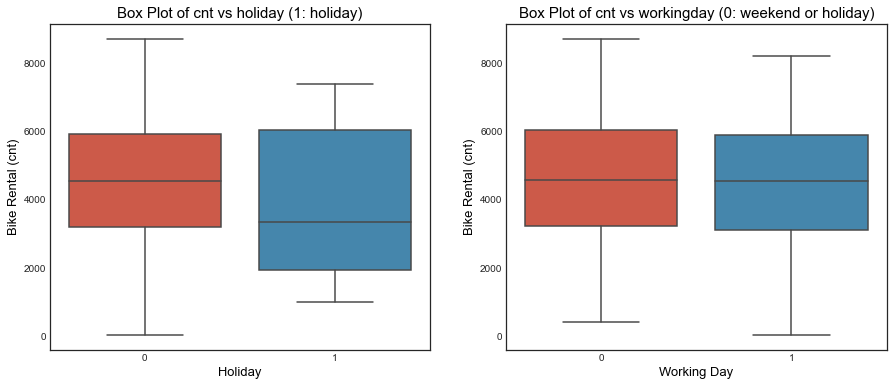

In [21]:
plt.figure(figsize=[15,6])
plt.style.use('seaborn-white')

plt.subplot(1,2,1)
sns.boxplot(data=bike, x='holiday', y='cnt')
plt.title('Box Plot of cnt vs holiday (1: holiday)', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('Holiday', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('Bike Rental (cnt)', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.subplot(1,2,2)
sns.boxplot(data=bike, x='workingday', y='cnt')
plt.title('Box Plot of cnt vs workingday (0: weekend or holiday)', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('Working Day', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('Bike Rental (cnt)', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.show()

<h3 style = 'color:blue'> Observation: Working Day or not has a minor effect bike rental demand

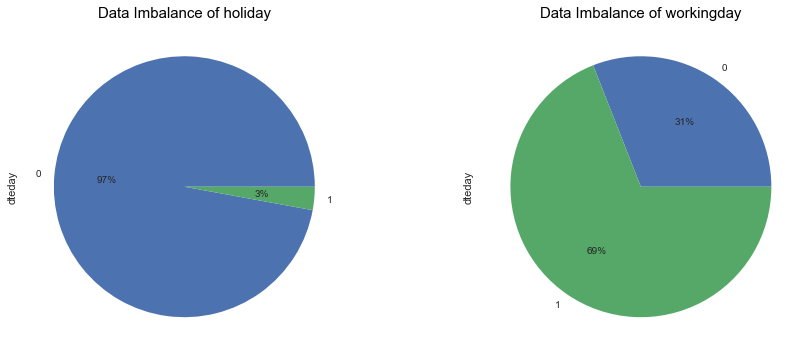

In [22]:
plt.figure(figsize=[15,6])
plt.style.use('seaborn')

plt.subplot(1,2,1)
bike.dteday.groupby(by=bike.holiday).count().plot.pie(autopct='%1.0f%%')
plt.title('Data Imbalance of holiday', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,2,2)
bike.dteday.groupby(by=bike.workingday).count().plot.pie(autopct='%1.0f%%')
plt.title('Data Imbalance of workingday', fontdict={'fontsize':15, 'color':'black'})
plt.show()

<h3 style = 'color:blue'> Observation: As expected, data imbalance is high in holiday. Due to weekend considerations, data imbalance is much better when we look at workingday parameter.

Text(0, 0.5, 'Bike Rental (cnt)')

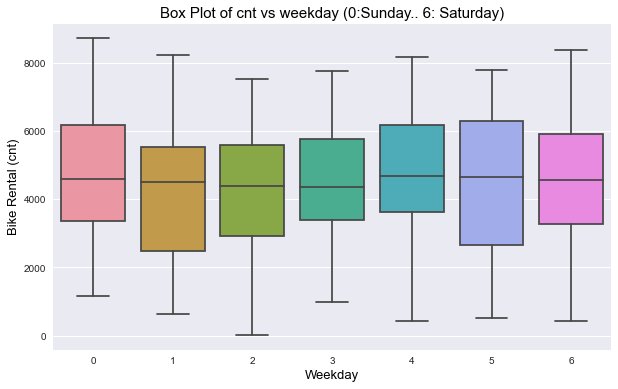

In [23]:
plt.figure(figsize=[10,6])
plt.style.use('seaborn')

sns.boxplot(data=bike, x='weekday', y='cnt')
plt.title('Box Plot of cnt vs weekday (0:Sunday.. 6: Saturday)', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('Weekday', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('Bike Rental (cnt)', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})


<h3 style = 'color:blue'> Observation: Bike Rental Demand more or less evenly spread out w.r.t weekday. This is interesting because the end user might be renting the bike to go to work on a working day.

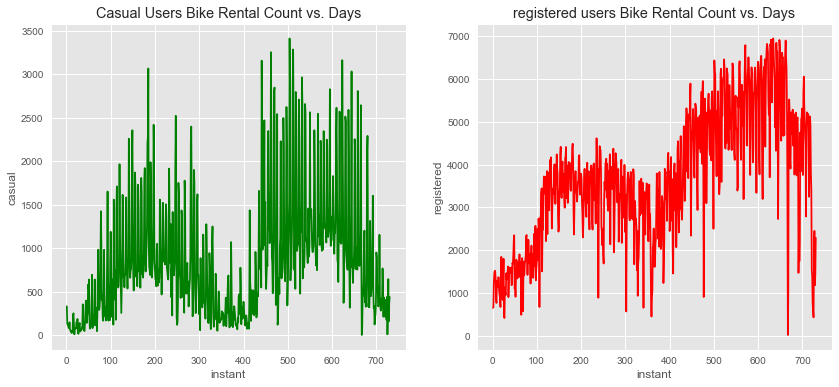

In [24]:
plt.figure(figsize=[14,6])
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.lineplot(data=bike, x='instant', y='casual', color='g')
plt.title('Casual Users Bike Rental Count vs. Days')

plt.subplot(1,2,2)
sns.lineplot(data=bike, x='instant', y='registered', color='r')
plt.title('registered users Bike Rental Count vs. Days')

plt.show()

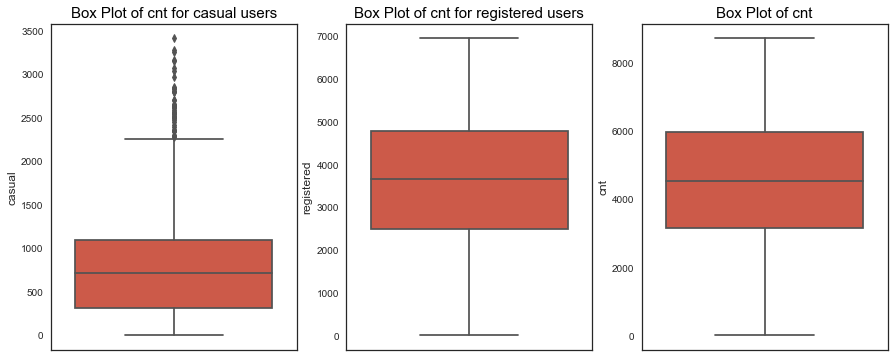

In [25]:
plt.figure(figsize=[15,6])
plt.style.use('seaborn-white')

plt.subplot(1,3,1)
sns.boxplot(data=bike, y='casual')
plt.title('Box Plot of cnt for casual users', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,3,2)
sns.boxplot(data=bike, y='registered')
plt.title('Box Plot of cnt for registered users', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,3,3)
sns.boxplot(data=bike, y='cnt')
plt.title('Box Plot of cnt', fontdict={'fontsize':15, 'color':'black'})

plt.show()

<h3 style = 'color:blue'> Observation: Registered users have a driving effect on the target variable. Casual user demand has higher variance. 

Now let us look at numerical variables

In [26]:
bike[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


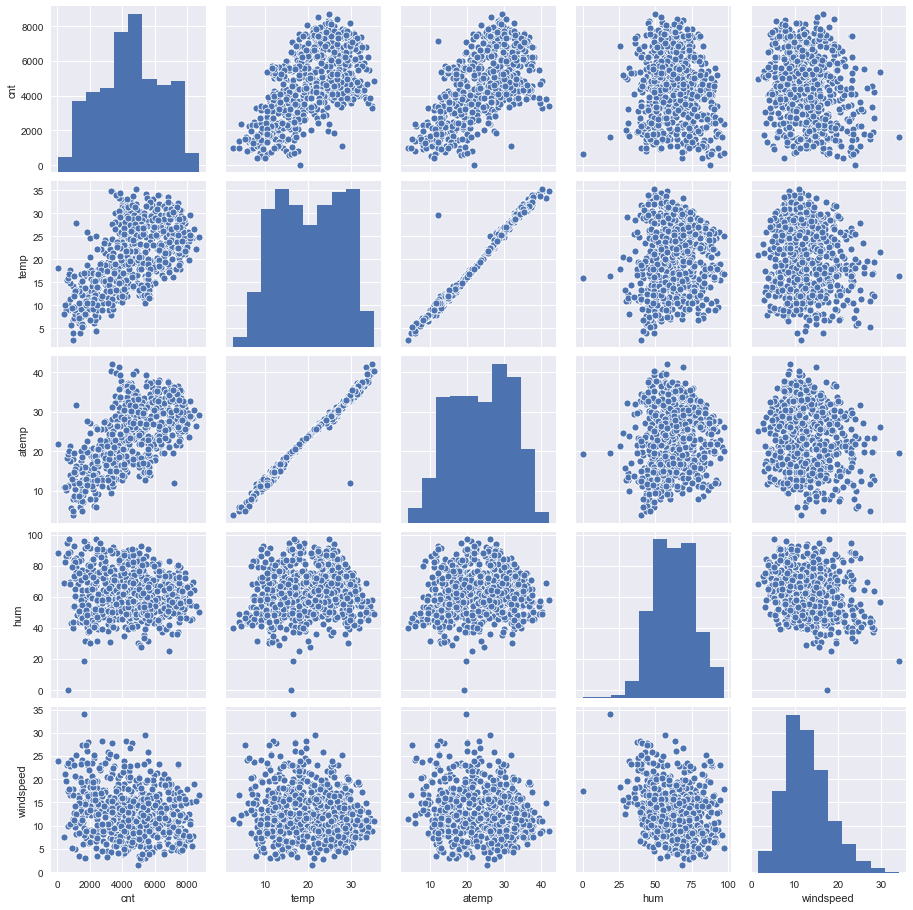

In [27]:
plt.style.use('seaborn')
sns.pairplot(bike[['cnt','temp','atemp','hum','windspeed']])
plt.show()

<h3 style = 'color:blue'> Observation: temp and atemp seems to be correlated. One of the two would be sufficient for MLR.

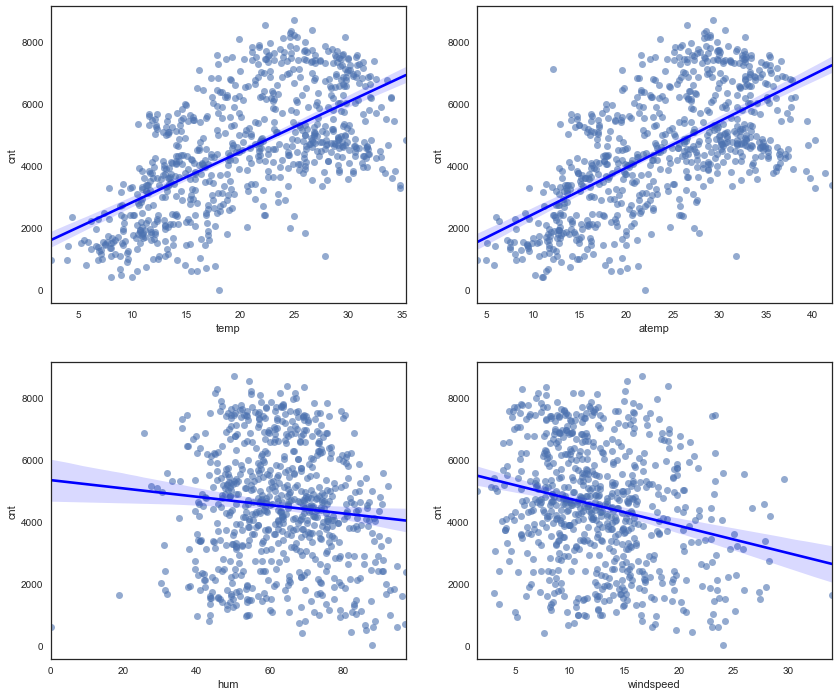

In [28]:
plt.figure(figsize=[14,12])
plt.style.use('seaborn-white')
plt.subplot(2,2,1)
sns.regplot(data=bike, x='temp', y='cnt',scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'})

plt.subplot(2,2,2)
sns.regplot(data=bike, x='atemp', y='cnt',scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'})

plt.subplot(2,2,3)
sns.regplot(data=bike, x='hum', y='cnt',scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'})

plt.subplot(2,2,4)
sns.regplot(data=bike, x='windspeed', y='cnt',scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'})

plt.show()

<h3 style = 'color:blue'> Observation: Windspeed seems to have a slightly higher correlation to cnt compared to humidity. Perhaps windspeed, humidity and temp are somehow connected with an equation to reach to atemp.

In [29]:
bike[['cnt','temp','atemp','hum','windspeed']].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


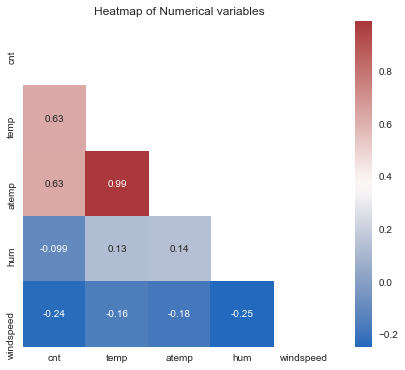

In [30]:
plt.figure(figsize = (7,6))
mask1 = np.zeros_like(bike[['cnt','temp','atemp','hum','windspeed']].corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(bike[['cnt','temp','atemp','hum','windspeed']].corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap of Numerical variables')
plt.show()

<h3 style = 'color:blue'> Observation: temp or atemp one seems to be sufficient for MLR.

<h3 style = 'color:blue'> Observation: If windspeed is used in MLR, then better to keep temp in the MLR model because it has a slightly lower correlation compared to that with atemp.

## Step-2: Prepare Data for Modeling

In [31]:
# Make a copy before proceeding further since original dataframe is kept intact
bike_new=bike.copy(deep=False)
bike_new.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,1,1,"Mist, Few clouds",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,2,1,"Mist, Few clouds",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [32]:
# Dummy Variables for season
status = pd.get_dummies(bike_new['season'])
status.head(3)

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0


drop the `Fall` column, because it can be identified with remaining columns 
- `100` will correspond to `Spring`
- `010` will correspond to `Summer`
- `001` will correspond to `Winter`
- `000` will correspond to `Fall`

In [33]:
# Dummy Variables for season with drop_first=True
status = pd.get_dummies(bike_new['season'],drop_first=True)
status.head(3)

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0


In [34]:
bike_new = pd.concat([bike_new, status], axis=1)
bike_new.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,1,01-01-2018,Spring,0,1,0,1,1,"Mist, Few clouds",14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,Spring,0,1,0,2,1,"Mist, Few clouds",14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,Spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0


In [35]:
bike_new.drop(columns='season', inplace=True)
bike_new.head(3)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter
0,1,01-01-2018,0,1,0,1,1,"Mist, Few clouds",14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,0,1,0,2,1,"Mist, Few clouds",14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0


In [36]:
# Dummy Variables for weathersit
status = pd.get_dummies(bike_new['weathersit'])
status.head(3)

,Clear,"Light Snow, Rain, Thunder","Mist, Few clouds"
0,0,0,1
1,0,0,1
2,1,0,0


In [37]:
# If we drop_first=True, the first columns which is Clear will be gone. 
# To keep business relevance intact, let us do the drop manually and rename the columns for better readablity
# Clear = Clear_Weather
# Mist, Few clouds = Fair_Weather
# Drop Light Snow, Rain, Thunder
status.drop(columns = 'Light Snow, Rain, Thunder',inplace=True) 
status.rename(columns={"Clear": "Clear_Weather", "Mist, Few clouds": "Fair_Weather"}, inplace=True)
status.head(3)

,Clear_Weather,Fair_Weather
0,0,1
1,0,1
2,1,0


identified with columns 
- `10` will correspond to `Clear`
- `01` will correspond to `Mist, Few clouds`
- `00` will correspond to `Light Snow, Rain, Thunder`

In [38]:
bike_new = pd.concat([bike_new, status], axis=1)
bike_new.drop(columns='weathersit', inplace=True)
bike_new.head(3)

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,Clear_Weather,Fair_Weather
0,1,01-01-2018,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0


In [39]:
# Drop dteday
bike_new.drop(columns='dteday', inplace=True) # dteday can be derived later from instant & start date of 01-01-2018

In [40]:
bike_new.head(3)

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,Clear_Weather,Fair_Weather
0,1,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0


In [41]:
bike_new[['cnt','weekday','mnth','yr']].corr()

,cnt,weekday,mnth,yr
cnt,1.000000,0.036183,2.781909e-01,5.697285e-01
weekday,0.036183,1.000000,-4.059002e-03,6.852851e-04
mnth,0.278191,-0.004059,1.000000e+00,-2.470170e-17
yr,0.569728,0.000685,-2.470170e-17,1.000000e+00


In [42]:
# Drop weekday
# EDA showed previously that weekday is not influencing cnt and also the correlation factor is low as we see above
bike_new.drop(columns='weekday', inplace=True) 
bike_new.head(3)

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Spring,Summer,Winter,Clear_Weather,Fair_Weather
0,1,0,1,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,0,1,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,0,1,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0


In [43]:
bike_new[['cnt','holiday','workingday']].corr()

,cnt,holiday,workingday
cnt,1.000000,-0.068764,-0.027640
holiday,-0.068764,1.000000,-0.257009
workingday,-0.027640,-0.257009,1.000000


The correlation of workingday and holiday is weak with cnt. But at this point we dont know if one of these variables can help to increase r2. So let us keep these 2 variables for now.

In [44]:
# Rearrange the columns for better readability

target_order = ['instant', 
                'cnt', 
                'temp', 'atemp', 'hum', 'windspeed',
                'yr', 'mnth',
                'Spring', 'Summer','Winter', 
                'Clear_Weather', 'Fair_Weather',
               'holiday', 'workingday',
               'casual', 'registered']
bike_new = bike_new[target_order]

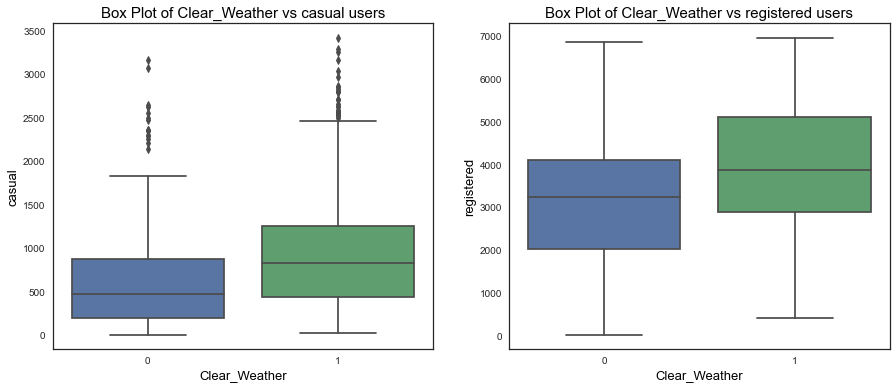

In [45]:
plt.figure(figsize=[15,6])
plt.style.use('seaborn-white')

plt.subplot(1,2,1)
sns.boxplot(data=bike_new, x='Clear_Weather', y='casual')
plt.title('Box Plot of Clear_Weather vs casual users', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('Clear_Weather', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('casual', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.subplot(1,2,2)
sns.boxplot(data=bike_new, x='Clear_Weather', y='registered')
plt.title('Box Plot of Clear_Weather vs registered users', fontdict={'fontsize':15, 'color':'black'})
plt.xlabel('Clear_Weather', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.ylabel('registered', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.show()

In [46]:
# A new metric is defined
# Casual_Ratio = casual / registered
# The metric says, on any given day how many casual users are using the bike rental when compared to registered users
# This metric can be OPTIONALLY used for MLR at a later stage
bike_new['Casual_Ratio'] = bike_new.casual/bike_new.registered

In [47]:
# Let us check what the correlation of this metric with cnt
bike_new[['cnt','Casual_Ratio']].corr()

,cnt,Casual_Ratio
cnt,1.000000,0.235277
Casual_Ratio,0.235277,1.000000


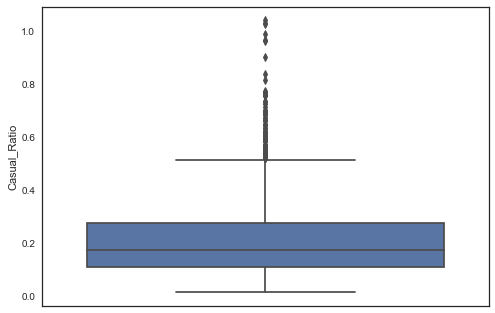

In [48]:
# Let us check how box plot looks like
sns.boxplot(data=bike_new, y='Casual_Ratio')

In [49]:
# Drop casual & registered since these cannot be used as predictor variables.
# cnt is target variable and we are not analyzing casual and registered users. 
bike_new.drop(columns=['casual','registered'], inplace = True)

In [50]:
bike_new.head(3)

,instant,cnt,temp,atemp,hum,windspeed,yr,mnth,Spring,Summer,Winter,Clear_Weather,Fair_Weather,holiday,workingday,Casual_Ratio
0,1,985,14.110847,18.18125,80.5833,10.749882,0,1,1,0,0,0,1,0,1,0.506116
1,2,801,14.902598,17.68695,69.6087,16.652113,0,1,1,0,0,0,1,0,1,0.195522
2,3,1349,8.050924,9.47025,43.7273,16.636703,0,1,1,0,0,1,0,0,1,0.097640


In [51]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        730 non-null    int64  
 1   cnt            730 non-null    int64  
 2   temp           730 non-null    float64
 3   atemp          730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   yr             730 non-null    int64  
 7   mnth           730 non-null    int64  
 8   Spring         730 non-null    uint8  
 9   Summer         730 non-null    uint8  
 10  Winter         730 non-null    uint8  
 11  Clear_Weather  730 non-null    uint8  
 12  Fair_Weather   730 non-null    uint8  
 13  holiday        730 non-null    int64  
 14  workingday     730 non-null    int64  
 15  Casual_Ratio   730 non-null    float64
dtypes: float64(5), int64(6), uint8(5)
memory usage: 66.4 KB


<h3 style = 'color:blue'> Data is converted to a clean format, ready for modeling.

<h3 style = 'color:blue'> Target = 1 column cnt. Possible Predictors = 14 columns.

## Step-3: Training the model

In [52]:
# Split into train - test dataset
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike_new, train_size=0.7, test_size= 0.3, random_state=80)
print (bike_train.shape,bike_test.shape)

(510, 16) (219, 16)


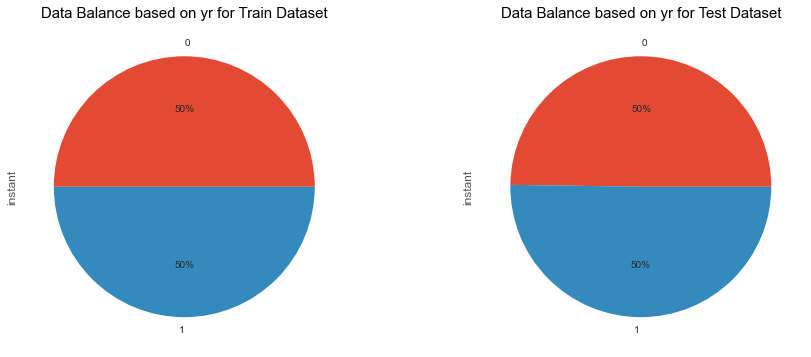

In [53]:
# Lets check if the split has balanced yr
plt.figure(figsize=[15,6])
plt.style.use('ggplot')

plt.subplot(1,2,1)
bike_train.instant.groupby(by=bike_train.yr).count().plot.pie(autopct='%1.0f%%')
plt.title('Data Balance based on yr for Train Dataset', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,2,2)
bike_test.instant.groupby(by=bike_test.yr).count().plot.pie(autopct='%1.0f%%')
plt.title('Data Balance based on yr for Test Dataset', fontdict={'fontsize':15, 'color':'black'})
plt.show()

<h3 style = 'color:blue'> Balanced 2018 and 2019 data in both train and test

In [54]:
# Standardization is not done here since negative cnt is not making much sense
# Normalization can be done in thi case
# but there are only 4-5 numerical varaibles which are of similar order of magnitude
# So as a first try, we will work with the data directly without normalization.# Split into train - test dataset

In [55]:
# This is a custom function to calculate VIF
def calc_VIF(X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    df_vif = pd.DataFrame()
    df_vif['Features'] = X_train.columns
    df_vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif.sort_values(by='VIF', ascending=False, inplace=True)
    return df_vif

In [56]:
# This is a dataframe to record adjusted_r2_score for the several models being built
df_r2 = pd.DataFrame()

In [57]:
# Lets use statsmodels & add one predictor at a time.

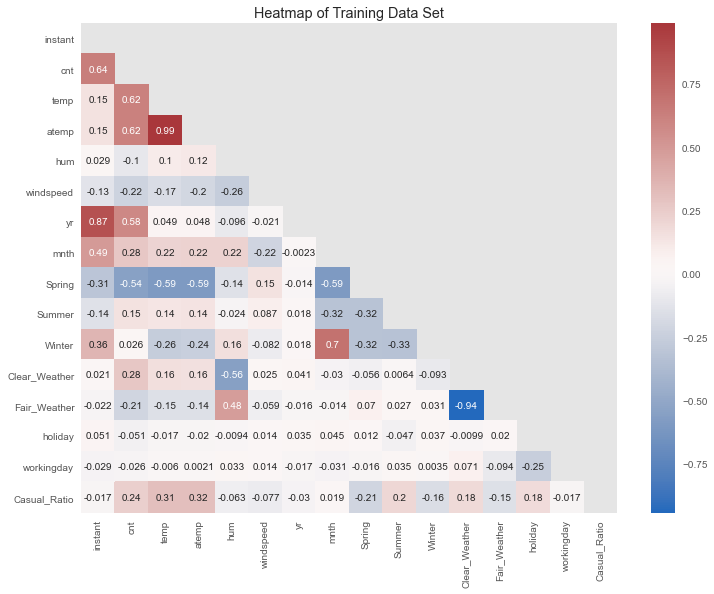

In [58]:
# Heatmap of Training Dataset for easy reference
plt.figure(figsize = (12,9))
mask1 = np.zeros_like(bike_train.corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(bike_train.corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap of Training Data Set')
plt.show()

### Linear Regression Model 1 (temp)

In [59]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm1 = sm.OLS(y_train, X_train_sm)
lm1_model = lm1.fit()
print (lm1_model.summary())
myDict = {'Model': 'Model-1', 'Predictors': str(pred_list),'R2': lm1_model.rsquared, 'Adj-R2': lm1_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     318.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.15e-55
Time:                        13:20:17   Log-Likelihood:                -4458.7
No. Observations:                 510   AIC:                             8921.
Df Residuals:                     508   BIC:                             8930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1265.2608    194.683      6.499      0.0

<h3 style = 'color:blue'> Observation: Temperature is significant with low p-value and gives a r2_score of 38.5%.

### Linear Regression Model 2 (temp, yr)

In [60]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp', 'yr']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train, X_train_sm)
lm2_model = lm2.fit()
print (lm2_model.summary())
myDict = {'Model': 'Model-2', 'Predictors': str(pred_list),'R2': lm2_model.rsquared, 'Adj-R2': lm2_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     569.3
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.38e-130
Time:                        13:20:17   Log-Likelihood:                -4282.6
No. Observations:                 510   AIC:                             8571.
Df Residuals:                     507   BIC:                             8584.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        336.8236    144.028      2.339      0.0

In [61]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706


In [62]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
0,temp,1.84
1,yr,1.84


<h3 style = 'color:blue'> Observation: Adding yr increases r2_score to 69% and no big multicollinearity.

### Linear Regression Model 3 (temp, yr, mnth)

In [63]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp', 'yr', 'mnth']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm3 = sm.OLS(y_train, X_train_sm)
lm3_model = lm3.fit()
print (lm3_model.summary())
myDict = {'Model': 'Model-3', 'Predictors': str(pred_list),'R2': lm3_model.rsquared, 'Adj-R2': lm3_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     425.6
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          6.39e-138
Time:                        13:20:17   Log-Likelihood:                -4261.7
No. Observations:                 510   AIC:                             8531.
Df Residuals:                     506   BIC:                             8548.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -73.7522    151.817     -0.486      0.6

In [64]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489


In [65]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
0,temp,4.52
2,mnth,4.03
1,yr,1.86


<h3 style = 'color:blue'> Observation: Adding mnth slightly increases r2_score to 71%. It has little collinearity with temp. mnth be dropped for next trial.

### Linear Regression Model 4 (temp, yr, windspeed)

In [66]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp', 'yr', 'windspeed']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm4 = sm.OLS(y_train, X_train_sm)
lm4_model = lm4.fit()
print (lm4_model.summary())
myDict = {'Model': 'Model-4', 'Predictors': str(pred_list),'R2': lm4_model.rsquared, 'Adj-R2': lm4_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     401.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.65e-133
Time:                        13:20:17   Log-Likelihood:                -4272.4
No. Observations:                 510   AIC:                             8553.
Df Residuals:                     506   BIC:                             8570.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        979.7462    200.069      4.897      0.0

In [67]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224


In [68]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
0,temp,3.98
2,windspeed,3.76
1,yr,1.92


### Linear Regression Model 5 (temp, yr, windspeed, hum)

In [69]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp', 'yr', 'windspeed', 'hum']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm5 = sm.OLS(y_train, X_train_sm)
lm5_model = lm5.fit()
print (lm5_model.summary())
myDict = {'Model': 'Model-5', 'Predictors': str(pred_list),'R2': lm5_model.rsquared, 'Adj-R2': lm5_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     332.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          7.44e-140
Time:                        13:20:17   Log-Likelihood:                -4254.0
No. Observations:                 510   AIC:                             8518.
Df Residuals:                     505   BIC:                             8539.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2402.5716    301.607      7.966      0.0

In [70]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379


In [71]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
3,hum,8.93
0,temp,7.17
2,windspeed,4.83
1,yr,1.93


### Linear Regression Model 6 (temp, atemp, windspeed, hum) 

In [72]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp', 'atemp', 'windspeed', 'hum']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm6 = sm.OLS(y_train, X_train_sm)
lm6_model = lm6.fit()
print (lm6_model.summary())
myDict = {'Model': 'Model-6', 'Predictors': str(pred_list),'R2': lm6_model.rsquared, 'Adj-R2': lm6_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     99.87
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.38e-62
Time:                        13:20:18   Log-Likelihood:                -4434.2
No. Observations:                 510   AIC:                             8878.
Df Residuals:                     505   BIC:                             8900.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3766.4183    435.339      8.652      0.0

In [73]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379
5,Model-6,"['temp', 'atemp', 'windspeed', 'hum']",0.441678,0.437256


In [74]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
1,atemp,445.44
0,temp,400.90
3,hum,10.65
2,windspeed,4.75


### Linear Regression Model 7 (atemp, yr) 

In [75]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['atemp', 'yr']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm7 = sm.OLS(y_train, X_train_sm)
lm7_model = lm7.fit()
print (lm7_model.summary())
myDict = {'Model': 'Model-7', 'Predictors': str(pred_list),'R2': lm7_model.rsquared, 'Adj-R2': lm7_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     571.6
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.19e-130
Time:                        13:20:18   Log-Likelihood:                -4281.9
No. Observations:                 510   AIC:                             8570.
Df Residuals:                     507   BIC:                             8582.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.2313    152.325      0.678      0.4

In [76]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379
5,Model-6,"['temp', 'atemp', 'windspeed', 'hum']",0.441678,0.437256
6,Model-7,"['atemp', 'yr']",0.692763,0.691551


In [77]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
0,atemp,1.86
1,yr,1.86


### Linear Regression Model 8 (atemp, windspeed, yr) 

In [78]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['atemp', 'windspeed', 'yr']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm8 = sm.OLS(y_train, X_train_sm)
lm8_model = lm8.fit()
print (lm8_model.summary())
myDict = {'Model': 'Model-8', 'Predictors': str(pred_list),'R2': lm8_model.rsquared, 'Adj-R2': lm8_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     396.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.17e-132
Time:                        13:20:18   Log-Likelihood:                -4274.5
No. Observations:                 510   AIC:                             8557.
Df Residuals:                     506   BIC:                             8574.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        674.4354    211.198      3.193      0.0

In [79]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379
5,Model-6,"['temp', 'atemp', 'windspeed', 'hum']",0.441678,0.437256
6,Model-7,"['atemp', 'yr']",0.692763,0.691551
7,Model-8,"['atemp', 'windspeed', 'yr']",0.701505,0.699735


In [80]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
0,atemp,4.13
1,windspeed,3.85
2,yr,1.93


<h3 style = 'color:blue'> Observation: Model-4 (temp, yr, windspeed) is giving 70% adjusted r2 & not so high multicollinearity.

In [81]:
bike_train.columns

Index(['instant', 'cnt', 'temp', 'atemp', 'hum', 'windspeed', 'yr', 'mnth',
       'Spring', 'Summer', 'Winter', 'Clear_Weather', 'Fair_Weather',
       'holiday', 'workingday', 'Casual_Ratio'],
      dtype='object')

### Linear Regression Model 9 (temp, yr, windspeed, 'Clear_Weather', 'Fair_Weather') 

In [82]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp', 'windspeed', 'yr', 'Clear_Weather', 'Fair_Weather']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm9 = sm.OLS(y_train, X_train_sm)
lm9_model = lm9.fit()
print (lm9_model.summary())
myDict = {'Model': 'Model-9', 'Predictors': str(pred_list),'R2': lm9_model.rsquared, 'Adj-R2': lm9_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     290.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          9.09e-146
Time:                        13:20:18   Log-Likelihood:                -4237.2
No. Observations:                 510   AIC:                             8486.
Df Residuals:                     504   BIC:                             8512.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -421.0575    327.067     -1.287

In [83]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379
5,Model-6,"['temp', 'atemp', 'windspeed', 'hum']",0.441678,0.437256
6,Model-7,"['atemp', 'yr']",0.692763,0.691551
7,Model-8,"['atemp', 'windspeed', 'yr']",0.701505,0.699735
8,Model-9,"['temp', 'windspeed', 'yr', 'Clear_Weather', '...",0.742137,0.739579


In [84]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
3,Clear_Weather,8.81
0,temp,7.41
1,windspeed,5.85
4,Fair_Weather,4.63
2,yr,2.01


### Linear Regression Model 10 (temp, yr, windspeed, 'Spring', 'Summer', 'Winter') 

In [85]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp', 'windspeed', 'yr', 'Spring', 'Summer', 'Winter']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm10 = sm.OLS(y_train, X_train_sm)
lm10_model = lm10.fit()
print (lm10_model.summary())
myDict = {'Model': 'Model-10', 'Predictors': str(pred_list),'R2': lm10_model.rsquared, 'Adj-R2': lm10_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.53e-150
Time:                        13:20:18   Log-Likelihood:                -4223.6
No. Observations:                 510   AIC:                             8461.
Df Residuals:                     503   BIC:                             8491.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1492.3040    326.975      4.564      0.0

In [86]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379
5,Model-6,"['temp', 'atemp', 'windspeed', 'hum']",0.441678,0.437256
6,Model-7,"['atemp', 'yr']",0.692763,0.691551
7,Model-8,"['atemp', 'windspeed', 'yr']",0.701505,0.699735
8,Model-9,"['temp', 'windspeed', 'yr', 'Clear_Weather', '...",0.742137,0.739579
9,Model-10,"['temp', 'windspeed', 'yr', 'Spring', 'Summer'...",0.755527,0.752611


In [87]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
1,windspeed,6.54
0,temp,4.57
2,yr,2.02
3,Spring,1.99
4,Summer,1.80
5,Winter,1.64


### Linear Regression Model 11 (temp, yr, windspeed, 'Spring', 'Fair_Weather') 

In [88]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp', 'yr', 'windspeed','Spring','Fair_Weather']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm11= sm.OLS(y_train, X_train_sm)
lm11_model = lm11.fit()
print (lm11_model.summary())
myDict = {'Model': 'Model-11', 'Predictors': str(pred_list),'R2': lm11_model.rsquared, 'Adj-R2': lm11_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     336.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          5.49e-158
Time:                        13:20:19   Log-Likelihood:                -4208.7
No. Observations:                 510   AIC:                             8429.
Df Residuals:                     504   BIC:                             8455.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2413.1940    213.694     11.293   

In [89]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379
5,Model-6,"['temp', 'atemp', 'windspeed', 'hum']",0.441678,0.437256
6,Model-7,"['atemp', 'yr']",0.692763,0.691551
7,Model-8,"['atemp', 'windspeed', 'yr']",0.701505,0.699735
8,Model-9,"['temp', 'windspeed', 'yr', 'Clear_Weather', '...",0.742137,0.739579
9,Model-10,"['temp', 'windspeed', 'yr', 'Spring', 'Summer'...",0.755527,0.752611


In [90]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
2,windspeed,5.07
0,temp,4.63
1,yr,1.95
3,Spring,1.55
4,Fair_Weather,1.45


<h3 style = 'color:blue'> Observation: Model-11 (temp, yr, windspeed,Spring, Fair_Weather) is giving low p-values, 76.7% adjusted r2, low multicollinearity with reasonable VIF.

In [91]:
bike_train.columns

Index(['instant', 'cnt', 'temp', 'atemp', 'hum', 'windspeed', 'yr', 'mnth',
       'Spring', 'Summer', 'Winter', 'Clear_Weather', 'Fair_Weather',
       'holiday', 'workingday', 'Casual_Ratio'],
      dtype='object')

### Linear Regression Model 12 (temp, yr, windspeed, 'Spring', 'Clear_Weather', holiday) 

In [92]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp','windspeed','yr','Spring','Clear_Weather', 'holiday']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm12= sm.OLS(y_train, X_train_sm)
lm12_model = lm12.fit()
print (lm12_model.summary())
myDict = {'Model': 'Model-12', 'Predictors': str(pred_list),'R2': lm12_model.rsquared, 'Adj-R2': lm12_model.rsquared_adj} # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     311.7
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          7.07e-166
Time:                        13:20:19   Log-Likelihood:                -4187.2
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     503   BIC:                             8418.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1873.6511    198.100      9.458

In [93]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379
5,Model-6,"['temp', 'atemp', 'windspeed', 'hum']",0.441678,0.437256
6,Model-7,"['atemp', 'yr']",0.692763,0.691551
7,Model-8,"['atemp', 'windspeed', 'yr']",0.701505,0.699735
8,Model-9,"['temp', 'windspeed', 'yr', 'Clear_Weather', '...",0.742137,0.739579
9,Model-10,"['temp', 'windspeed', 'yr', 'Spring', 'Summer'...",0.755527,0.752611


In [94]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
0,temp,5.36
1,windspeed,5.13
4,Clear_Weather,2.74
2,yr,1.96
3,Spring,1.53
5,holiday,1.03


<h3 style = 'color:blue'> Observation: Model-12 (temp, yr, windspeed,Spring, Clear_weather, holiday) is giving low p-values, 78.6% adjusted r2, low multicollinearity with reasonable VIF.

### Linear Regression Model 13: temp, temp_squared, windspeed, yr, Spring, Summer, Clear_Weather, Fair_Weather & holiday

In [95]:
# Now let us transform temperature to its higher orders
# For sake of simplicty only the second order is taken into account.

bike_train['temp_squared'] = bike_train.temp**2
bike_test['temp_squared'] = bike_test.temp**2

# bike_train['atemp_squared'] = bike_train.atemp**2
# bike_test['atemp_squared'] = bike_test.atemp**2

# bike_train['windspeed_squared'] = bike_train.windspeed**2
# bike_test['windspeed_squared'] = bike_test.windspeed**2

# bike_train['temp_cubed'] = bike_train.temp**3
# bike_test['temp_cubed'] = bike_test.temp**3

bike_train.head(2)

,instant,cnt,temp,atemp,hum,windspeed,yr,mnth,Spring,Summer,Winter,Clear_Weather,Fair_Weather,holiday,workingday,Casual_Ratio,temp_squared
659,660,7058,19.9875,24.14710,56.8333,5.459381,1,10,0,0,1,1,0,0,1,0.133269,399.500156
129,130,4803,21.8325,26.13605,48.9167,7.749957,0,5,0,1,0,1,0,0,1,0.168898,476.658056


In [96]:
# Deine X and y, model, print and store prediction power in a dataframe
pred_list = ['temp','temp_squared','windspeed',
             'yr',
             'Spring','Summer',
             'Clear_Weather','Fair_Weather',
             'holiday']
X_train = bike_train[pred_list]
y_train = bike_train['cnt']
X_train_sm = sm.add_constant(X_train)
lm13= sm.OLS(y_train, X_train_sm)
lm13_model = lm13.fit()
print (lm13_model.summary())
myDict = {'Model': 'Model-13', 'Predictors': str(pred_list),'R2': lm13_model.rsquared, 'Adj-R2': lm13_model.rsquared_adj
         } # dict with values of r2, adj r2
df_r2 = df_r2.append(myDict, ignore_index=True) # Append r2 and adj r2 to the dataframe
df_r2 = df_r2[['Model', 'Predictors', 'R2', 'Adj-R2']] # Reorder

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     279.9
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          7.09e-189
Time:                        13:20:19   Log-Likelihood:                -4124.3
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     500   BIC:                             8311.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2538.5920    413.021     -6.146

In [97]:
# Keep Track of R2 and ajdusted r2
df_r2

,Model,Predictors,R2,Adj-R2
0,Model-1,['temp'],0.385375,0.384165
1,Model-2,"['temp', 'yr']",0.691921,0.690706
2,Model-3,"['temp', 'yr', 'mnth']",0.716171,0.714489
3,Model-4,"['temp', 'yr', 'windspeed']",0.703979,0.702224
4,Model-5,"['temp', 'yr', 'windspeed', 'hum']",0.724560,0.722379
5,Model-6,"['temp', 'atemp', 'windspeed', 'hum']",0.441678,0.437256
6,Model-7,"['atemp', 'yr']",0.692763,0.691551
7,Model-8,"['atemp', 'windspeed', 'yr']",0.701505,0.699735
8,Model-9,"['temp', 'windspeed', 'yr', 'Clear_Weather', '...",0.742137,0.739579
9,Model-10,"['temp', 'windspeed', 'yr', 'Spring', 'Summer'...",0.755527,0.752611


In [98]:
# VIF of X_train
vif = calc_VIF(X_train)
vif

,Features,VIF
0,temp,148.31
1,temp_squared,65.80
6,Clear_Weather,16.54
7,Fair_Weather,9.59
2,windspeed,7.32
4,Spring,2.16
3,yr,2.05
5,Summer,1.59
8,holiday,1.04


<h3 style = 'color:blue'> Observation: Model-13 (temp, temp_squared, windspeed, yr, Spring, Summer, Clear_Weather, Fair_Weather & holiday) is giving low p-values, 83% adjusted r2. The multicollinearity of temp and temp_squared is not unusual since they are transformed variables from the same temperature data. The multicollinearity of Clear_weather is high, however this varaible is sensible for the business.

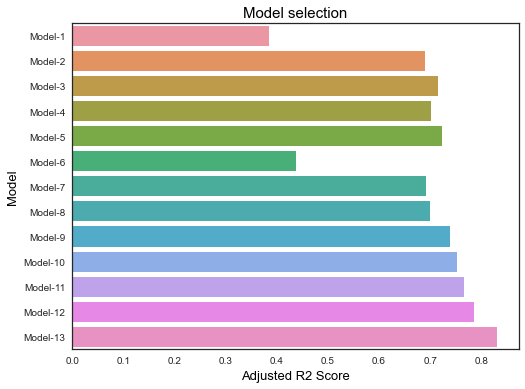

In [99]:
# Model selection
plt.figure(figsize=[8,6])
plt.style.use('seaborn-white')

sns.barplot(data=df_r2, y='Model', x='Adj-R2', orient='h')
plt.title('Model selection', fontdict={'fontsize':15, 'color':'black'})
plt.ylabel('Model', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})
plt.xlabel('Adjusted R2 Score', fontdict = {'fontsize': 13, 'fontweight': 6, 'color' : 'black'})

plt.show()

Automated Variable Selection Using Recursive Feature Elimination RFE is not done because we have fairly good models with r2_scores 80%.

<h3 style = 'color:brown'> Conclusion after training the model: model-12 and model-13 both will be taken forward for residual analysis & model evaluation with test data. During the interpretation stage, one final model will be selected.

## Step-4: Residual Analysis

In [100]:
# Predict y for model 12
X_train_model_12 = bike_train[['temp','windspeed','yr','Spring','Clear_Weather', 'holiday']]
X_train_model_12_sm = sm.add_constant(X_train_model_12)
y_train_pred_model_12 = lm12_model.predict(X_train_model_12_sm)

# Predict y for model 13
X_train_model_13 = bike_train[['temp','temp_squared','windspeed','yr',
                               'Spring','Summer','Clear_Weather','Fair_Weather','holiday']]
X_train_model_13_sm = sm.add_constant(X_train_model_13)
y_train_pred_model_13 = lm13_model.predict(X_train_model_13_sm)

In [101]:
# Residuals for model 12
y_train = bike_train['cnt']
res_model_12 = y_train - y_train_pred_model_12

# Residuals for model 13
res_model_13 = y_train - y_train_pred_model_13

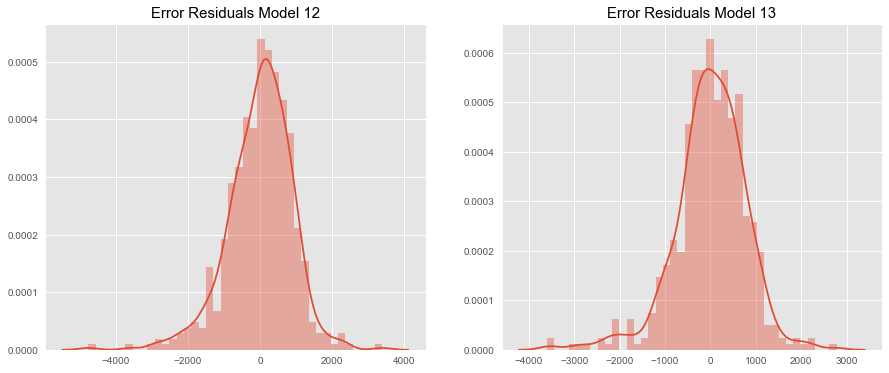

In [102]:
# Distribution plot of residuals - Check of Noraml Distrition Assumption
plt.figure(figsize=[15,6])
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.distplot(res_model_12, bins=40)
plt.title('Error Residuals Model 12', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,2,2)
sns.distplot(res_model_13, bins=40)
plt.title('Error Residuals Model 13', fontdict={'fontsize':15, 'color':'black'})

plt.show()

In [103]:
# Print Mean of error residuals and standard deviation

print ('\nTRAIN DATA SET \n')

print ('{} is the mean of errors with Model 12'.format(res_model_12.mean()))
print ('{} is the mean of errors with Model 13'.format(res_model_13.mean()))
print ('{} is the std deviation of errors with Model 12'.format(res_model_12.std()))
print ('{} is the std deviation of errors with Model 13'.format(res_model_13.std()))


TRAIN DATA SET 

2.815866929606772e-12 is the mean of errors with Model 12
-1.0029497406874583e-10 is the mean of errors with Model 13
890.9490444196097 is the std deviation of errors with Model 12
787.5887041442147 is the std deviation of errors with Model 13


In [104]:
# Calculate r2 score and mean score with sklearn

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print ('\nTRAIN DATA SET \n')

r2_score_model_12_train = r2_score(y_true=y_train, y_pred=y_train_pred_model_12)
print ('{:.3f} is the R-squared of Model 12'.format(r2_score_model_12_train))

r2_score_model_13_train = r2_score(y_true=y_train, y_pred=y_train_pred_model_13)
print ('{:.3f} is the R-squared of Model 13'.format(r2_score_model_13_train))

rss_score_model_12_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred_model_12)
print ('{:.1f} is the RSS of Model 12'.format(rss_score_model_12_train))

rss_score_model_13_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred_model_13)
print ('{:.1f} is the RSS of Model 13'.format(rss_score_model_13_train))


TRAIN DATA SET 

0.788 is the R-squared of Model 12
0.834 is the R-squared of Model 13
792233.7 is the RSS of Model 12
619079.7 is the RSS of Model 13


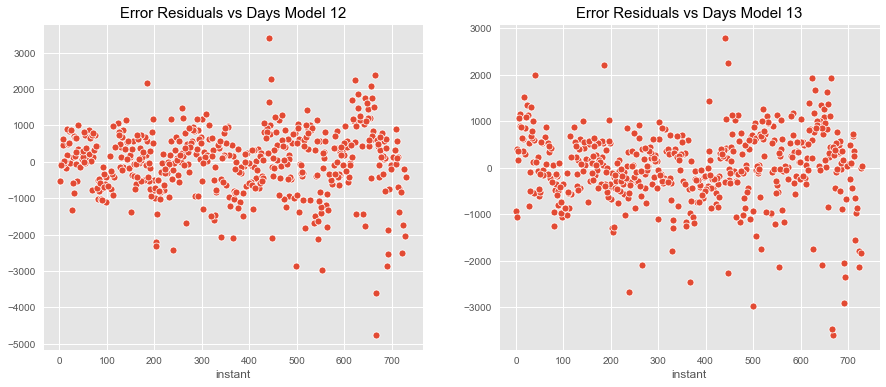

In [105]:
# Scatter plot of residuals - Check of error terms independent assumption
plt.figure(figsize=[15,6])
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.scatterplot(x=bike_train.instant, y=res_model_12)
plt.title('Error Residuals vs Days Model 12', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,2,2)
sns.scatterplot(x=bike_train.instant, y=res_model_13)
plt.title('Error Residuals vs Days Model 13', fontdict={'fontsize':15, 'color':'black'})

plt.show()

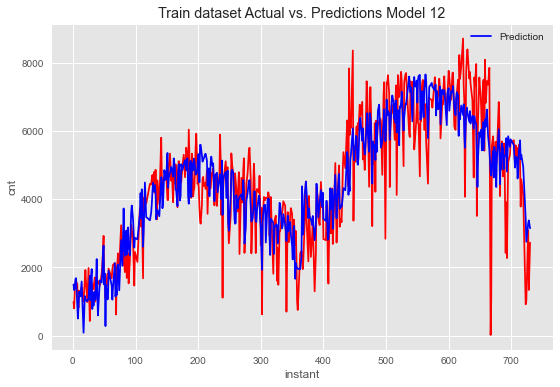

In [106]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=bike_train.instant, y=y_train, color='r')
sns.lineplot(x=bike_train.instant, y=y_train_pred_model_12,color="b", label="Prediction")
plt.title ('Train dataset Actual vs. Predictions Model 12')
plt.show()

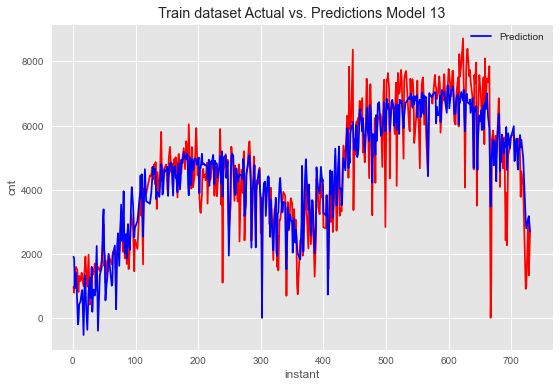

In [107]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=bike_train.instant, y=y_train, color='r')
sns.lineplot(x=bike_train.instant, y=y_train_pred_model_13,color="b", label="Prediction")
plt.title ('Train dataset Actual vs. Predictions Model 13')
plt.show()

<h3 style = 'color:brown'> Conclusion after residual analysis: model-12 and model-13 both have passed the residual analysis. Normal Dist & Indepdendence of error terms are fulfilled. Both the models look quite robust in Actual vs. Predictions. The metrics like RSS, std deviation of error residuals are infact better for model-13 compared to model-12.

Now lets evaluate the model with the unseen test data.

## Step-5: Predictions and Model Evaluation with the Test Set

In [108]:
bike_test.head(2)

,instant,cnt,temp,atemp,hum,windspeed,yr,mnth,Spring,Summer,Winter,Clear_Weather,Fair_Weather,holiday,workingday,Casual_Ratio,temp_squared
254,255,4713,26.418268,30.10650,69.2174,5.957171,0,9,0,0,0,1,0,0,1,0.171514,697.924884
5,6,1606,8.378268,11.66045,51.8261,6.000868,0,1,1,0,0,1,0,0,0,0.057971,70.195375


In [109]:
# Test Data Predict y for model 12
X_test_model_12 = bike_test[['temp','windspeed','yr','Spring','Clear_Weather', 'holiday']]
X_test_model_12_sm = sm.add_constant(X_test_model_12)
y_test_pred_model_12 = lm12_model.predict(X_test_model_12_sm)

# Test Data Predict y for model 13
X_test_model_13 = bike_test[['temp','temp_squared','windspeed','yr',
                               'Spring','Summer','Clear_Weather','Fair_Weather','holiday']]
X_test_model_13_sm = sm.add_constant(X_test_model_13)
y_test_pred_model_13 = lm13_model.predict(X_test_model_13_sm)

In [110]:
# Test Data Residuals for model 12
y_test = bike_test['cnt']
res_model_test_12 = y_test - y_test_pred_model_12

# Test Data Residuals for model 13
res_model_test_13 = y_test - y_test_pred_model_13

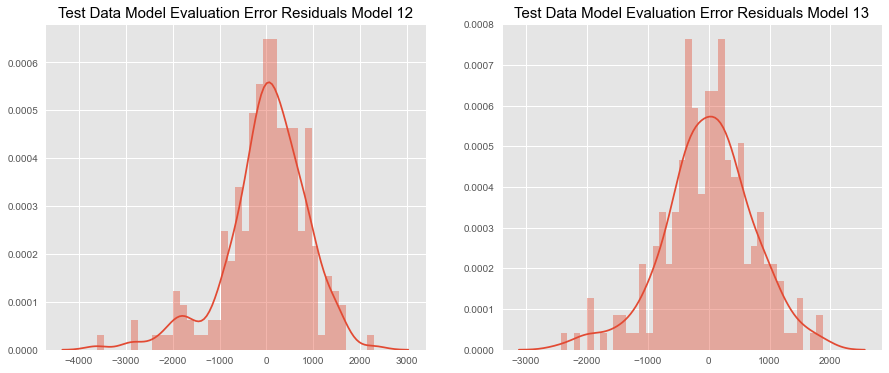

In [111]:
# Distribution plot of residuals - Check of Noraml Distrition Assumption
plt.figure(figsize=[15,6])
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.distplot(res_model_test_12, bins=40)
plt.title('Test Data Model Evaluation Error Residuals Model 12', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,2,2)
sns.distplot(res_model_test_13, bins=40)
plt.title('Test Data Model Evaluation Error Residuals Model 13', fontdict={'fontsize':15, 'color':'black'})

plt.show()

In [112]:
# Print Mean of error residuals and standard deviation

print ('\nTEST DATA SET \n')

print ('{} is the mean of errors with Model 12'.format(res_model_test_12.mean()))
print ('{} is the mean of errors with Model 13'.format(res_model_test_13.mean()))
print ('{} is the std deviation of errors with Model 12'.format(res_model_test_12.std()))
print ('{} is the std deviation of errors with Model 13'.format(res_model_test_13.std()))


TEST DATA SET 

6.541407954246741 is the mean of errors with Model 12
0.6523175078801349 is the mean of errors with Model 13
871.1228924015865 is the std deviation of errors with Model 12
733.7259264927734 is the std deviation of errors with Model 13


At the first look the mean of errors looks greater than 0. But a closer look shows that the the max error is about 3000. In terms of 3000, 0.65 is numerically negligible.

In [113]:
# Calculate r2 score and mean score with sklearn

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print ('\nTEST DATA SET \n')

r2_score_model_12_test = r2_score(y_true=y_test, y_pred=y_test_pred_model_12)
print ('{:.3f} is the R-squared of Model 12'.format(r2_score_model_12_test))

r2_score_model_13_test = r2_score(y_true=y_test, y_pred=y_test_pred_model_13)
print ('{:.3f} is the R-squared of Model 13'.format(r2_score_model_13_test))

rss_score_model_12_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_model_12)
print ('{:.1f} is the RSS of Model 12'.format(rss_score_model_12_test))

rss_score_model_13_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_model_13)
print ('{:.1f} is the RSS of Model 13'.format(rss_score_model_13_test))


TEST DATA SET 

0.799 is the R-squared of Model 12
0.858 is the R-squared of Model 13
755432.8 is the RSS of Model 12
535895.9 is the RSS of Model 13


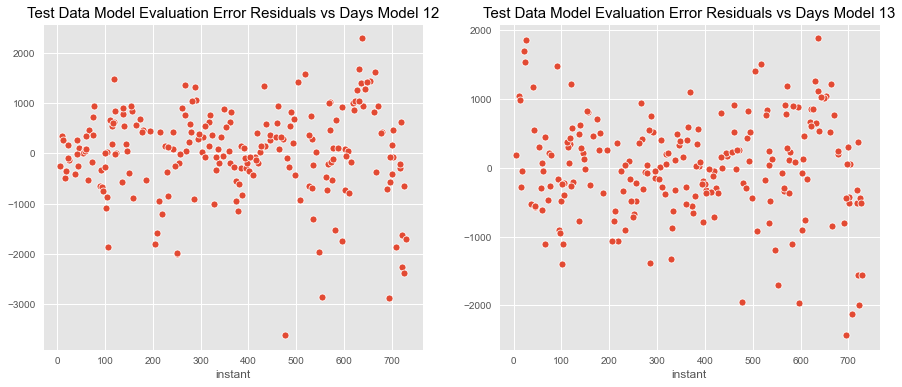

In [114]:
# Scatter plot of residuals - Check of error terms independent assumption
plt.figure(figsize=[15,6])
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.scatterplot(x=bike_test.instant, y=res_model_test_12)
plt.title('Test Data Model Evaluation Error Residuals vs Days Model 12', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,2,2)
sns.scatterplot(x=bike_test.instant, y=res_model_test_13)
plt.title('Test Data Model Evaluation Error Residuals vs Days Model 13', fontdict={'fontsize':15, 'color':'black'})

plt.show()

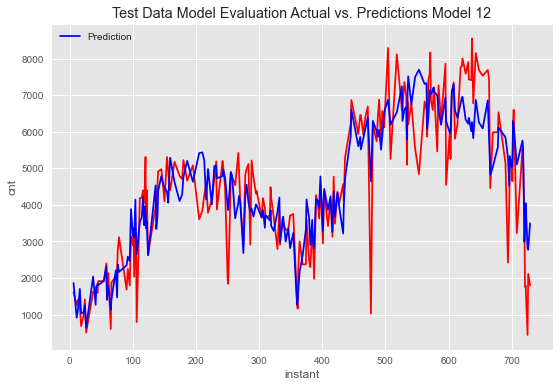

In [115]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=bike_test.instant, y=y_test, color='r')
sns.lineplot(x=bike_test.instant, y=y_test_pred_model_12,color="b", label="Prediction")
plt.title ('Test Data Model Evaluation Actual vs. Predictions Model 12')
plt.show()

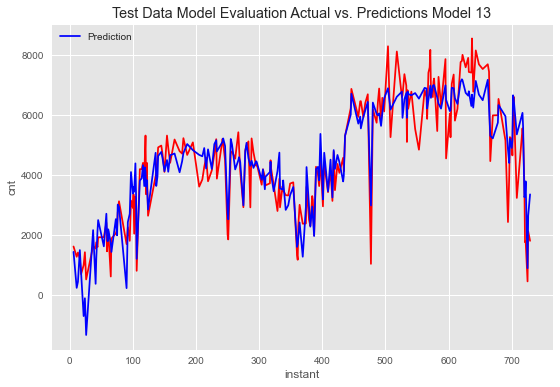

In [116]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=bike_test.instant, y=y_test, color='r')
sns.lineplot(x=bike_test.instant, y=y_test_pred_model_13,color="b", label="Prediction")
plt.title ('Test Data Model Evaluation Actual vs. Predictions Model 13')
plt.show()

## Step-6: Model Interpretation

`Summary of Bike Sharing Assigment:`<br>
**After EDA, Supervised Machine Learning with Linear Regression was performed.**<br>
**13 models were built up and 2 best models were selected for residual and model evaluation.**<br>
**Finally one model is proposed: Model-13 with r2 of 86% with 9 predictor variables is interpreted below.**<br>
**Note: There is an alternative model Model-12 with r2 of 80% with 6 predictor variables in the sections above.**<br>

`9 Predictor Variables of the Proposed Model:`<br>
**temperature in Celsius**<br>
**square of temperature**<br>
**windspeed**<br>
**year (0:2018 and 1:2019)**<br>
**Season-1 Spring (1:Spring)**<br>
**Season-2 Summer (1:Summer)**<br>
**Weathersit-1 Clear_Weather (1 for Clear, Few clouds, Partly cloudy, Partly cloudy)**<br>
**Weathersit-2 Fair_Weather (1 for Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)**<br>
**holiday (weather day is a holiday or not, 1: holiday)**<br>

`Multiple linear regression equation for cnt is (no normalization or standardization is done):`<br>

$ cnt = -2538.59 + 406.31  \times  temp - 7.44  \times  tempsquared - 36.97 \times windspeed + 2007.14 \times yr - 1113.73 \times Spring - 276.57 \times Summer + 2418.64 \times ClearWeather + 1720.46 \times FairWeather(Few clouds, Mist) - 644.84 \times holiday $

In [117]:
# Excat values of coefficients
lm13_model.params

const           -2538.591968
temp              406.309228
temp_squared       -7.444453
windspeed         -36.969484
yr               2007.142975
Spring          -1113.727610
Summer           -276.574424
Clear_Weather    2418.642733
Fair_Weather     1720.461571
holiday          -644.848990
dtype: float64

`Key Variables which have a positive relation on Bike Rental Demand cnt:`<br>
**yr (1: 2019)**<br>
**Weathersit-1 Clear_Weather (1 for Clear, Few clouds, Partly cloudy, Partly cloudy)**<br>
**Weathersit-2 Fair_Weather (1 for Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)**<br>

`Key Variables which have a negative relation on Bike Rental Demand cnt:`<br>
**windspeed**<br>
**Season-1 Spring (1:Spring)**<br>
**Season-2 Summer (2:Summer)**<br>
**holiday whether day is holiday or not (1: holiday)**<br>

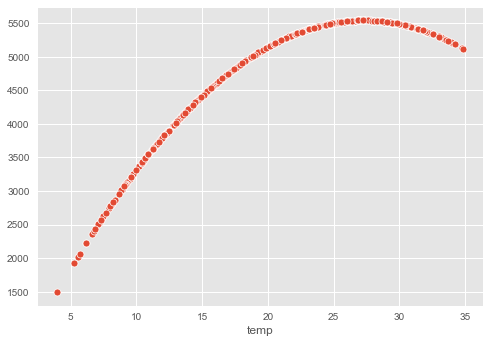

In [118]:
# temperature is influencing also temp_squared due to transformation
# it is not correct to interpret it based on one coefficient specially when one is positive and another negative :-)

# Lets see the real influence of temperature

y_check_temp = 406.309228 * bike_train['temp'] -7.444453 * bike_train['temp_squared']
sns.scatterplot(x=bike_train['temp'], y=y_check_temp)
plt.show()

`Interpretation of Temperature on Bike Rental Demand cnt:`<br>
**Positive effect on bike rental cnt till the temperature is about 27 degrees Celsius.**<br>
**Clear negative effect on bike rental cnt above 30 degrees Celsius.**<br>
**This makes sense because at high temperatures, biking is not pleasant for many.**<br>

In [119]:
print (vif)

        Features     VIF
0           temp  148.31
1   temp_squared   65.80
6  Clear_Weather   16.54
7   Fair_Weather    9.59
2      windspeed    7.32
4         Spring    2.16
3             yr    2.05
5         Summer    1.59
8        holiday    1.04


`Multicollinearity Check`<br>
**VIF of temp is 148. This is because temp_squared is also the model and it is expected. taken care while interpretation.**<br>
**VIF of Clear_Weather is 16. This might be because temperature and Fair_Weather are connected to it.**<br>
**This is not a big problem since the partner weathersit dummy variable Fair_Weather is also included in the model.**<br>

In [120]:
print ('\nModel Evaluation Metrics on Training Dataset \n')
print ('All coefficients have p-value less than 0.002')
print ('{:.3f} is the R-squared'.format(r2_score_model_13_train))
print ('{:.3f} is the Adjusted R-squared'.format(lm13_model.rsquared_adj))
print (lm13_model.f_pvalue,' is the Prob (F-statistic)')
print ('{:.1f} is the AIC score'.format(lm13_model.aic))
print ('{:.1f} is the BIC score'.format(lm13_model.bic))
print ('{:.1f} is the RSS'.format(rss_score_model_13_train))
print ('{:.1f} is the std deviation of Residuals'.format(res_model_13.std()))


Model Evaluation Metrics on Training Dataset 

All coefficients have p-value less than 0.002
0.834 is the R-squared
0.831 is the Adjusted R-squared
7.092573835487853e-189  is the Prob (F-statistic)
8268.7 is the AIC score
8311.0 is the BIC score
619079.7 is the RSS
787.6 is the std deviation of Residuals


In [121]:
print ('\nModel Evaluation Metrics on Test Dataset \n')
#print ('All coefficients have p-value less than 0.002')
print ('{:.3f} is the R-squared'.format(r2_score_model_13_test))
adj_r2_score_model_13_test = 1-(1-r2_score_model_13_test)*(bike_test.shape[0]-1)/(bike_test.shape[0]-lm13_model.params.shape[0]-1)
print ('{:.3f} is the Adjusted R-squared'.format(adj_r2_score_model_13_test))
#print (lm13_model.f_pvalue,' is the Prob (F-statistic)')
#print ('{:.1f} is the AIC score'.format(lm13_model.aic))
#print ('{:.1f} is the BIC score'.format(lm13_model.bic))
print ('{:.1f} is the RSS'.format(rss_score_model_13_test))
print ('{:.1f} is the std deviation of Residuals'.format(res_model_test_13.std()))


Model Evaluation Metrics on Test Dataset 

0.858 is the R-squared
0.851 is the Adjusted R-squared
535895.9 is the RSS
733.7 is the std deviation of Residuals


In [122]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred_model_13)

0.8577535581538694

`Model Performance`<br>
**All p-values below 0.002 for training dataset. Reject null hypotheses and all the predictors are significant.**<br>
**Adjusted R2 scores of 83% on training dataset.**<br>
**Adjusted R2 scores of 85% on test dataset.**<br>
**Standard Deviation Comparable for both test and training dataset**<br>

`Residual Analysis`<br>
**Errors are normally distributed**<br>
**Error terms are independent of each other based on scatter plots**<br>
**Mean of error terms is numerically zero**<br>

`Model Evaluation`<br>
**No signs on overfitting seen during residual analysis of test data set**<br>
**Good agreement between predicted cnt and actual cnt for test data set**<br>

`Few other insights and comments`<br>
**Bike rental demand is similar whether it is workingday or weekend. This suggests that users might be using bikes to reach to work or uni etc.**<br>
**Closer analysis of registered cnt vs. casual cnt will be interesting to analyze. It might be that registered cnt & workingday have a connection and casual cnt & weatersit have a connection.**<br>
**Promotional offers targetting casual users on a good weather can lead to increased revenues.**<br>
**Advertisement targetting registered users availing bike rental to go to work or uni can lead to stable & increased revenues.**<br>
**On holidays, the bike rental demand generally reduces.**<br>

`Submission Harish Dave`